In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Loading data function for function2
def load_data():
    A = np.loadtxt("data/fun2_A.txt").reshape((500, 100))
    b = np.loadtxt("data/fun2_b.txt").reshape(-1, 1)
    c = np.loadtxt("data/fun2_c.txt").reshape(-1, 1)
    return A, b, c


# Initialize coefficient and start point
A, b, c = load_data()
x0_f1 = np.random.rand(100)
x0_f2 = np.abs(np.random.rand(100))
x0_f3 = np.array([0.0, 0.0])

# Define three functions: 

In [52]:
# Define function1
def function1(x):
    return np.sum(np.arange(1, len(x) + 1) * x**2)


def grad_function1(x):
    return 2 * np.arange(1, len(x) + 1) * x

In [53]:
# Define function2
def function2(x, A, b, c):
    Ax = A @ x
    return c.T @ x - np.sum(np.log(np.clip(b.flatten() - Ax, 1e-8, None)))


def grad_function2(x, A, b, c):
    Ax = A @ x
    term = 1 / (b.flatten() - Ax)
    return c.flatten() + A.T @ term


def hessian_function2(x, A, b):
    Ax = A @ x
    D = np.diagflat(1 / np.clip((b.flatten() - Ax) ** 2, 1e-10, None))
    H = A.T @ D @ A
    H += 1e-6 * np.eye(H.shape[0])
    return H

In [54]:
# Define function3
def function3(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2


def grad_function3(x):
    return np.array(
        [-400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0]), 200 * (x[1] - x[0] ** 2)]
    )


def hessian_function3(x):
    return np.array(
        [[1200 * x[0] ** 2 - 400 * x[1] + 2, -400 * x[0]], [-400 * x[0], 200]]
    )

# Gradient Descent method: 

In [55]:
# Optimization method 1: GD
def gradient_descent(func, grad_func, x0, alpha=0.001, tol=1e-6, max_iter=200):
    x = x0
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        history.append(func(x))
        x = x - alpha * grad
        if np.linalg.norm(grad) < tol:
            break
    return x, history

# Newton method: 

In [56]:
def line_search_newton(func, x, p, grad, alpha=1.0, c1=1e-4, rho=0.9):
    while func(x + alpha * p) > func(x) + c1 * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha


# Optimization method 2: Newton
def newton_method(func, grad_func, hess_func, x0, tol=1e-6, max_iter=200):
    x = x0
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        hess = hess_func(x)
        history.append(func(x))
        try:
            p = -np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            print(f"Iteration {i}: Stopping because Hessian is singular.")
            break
        alpha = line_search_newton(func, x, p, grad)
        x = x + alpha * p
        if np.linalg.norm(grad) < tol:
            break
    return x, history

# Quasi-Newton method: 

In [57]:
def line_search(func, grad_func, x, p, alpha=1.0, c1=1e-4, rho=0.9):
    while func(x + alpha * p) > func(x) + c1 * alpha * np.dot(grad_func(x), p):
        alpha *= rho
    return alpha


def quasi_newton(func, grad_func, x0, tol=1e-4, max_iter=200):
    x = x0
    n = len(x0)
    I = np.eye(n)
    H = I
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        history.append(func(x))
        if np.linalg.norm(grad) < tol:
            print(f"Converged in {i} iterations")
            break
        p = -H @ grad
        alpha = line_search(func, grad_func, x, p)
        x_new = x + alpha * p
        s = x_new - x
        y = grad_func(x_new) - grad
        ys = y @ s
        if ys < 1e-10:
            print("Warning.")
            break
        rho = 1.0 / ys
        H = (I - rho * np.outer(s, y)) @ H @ (
            I - rho * np.outer(y, s)
        ) + rho * np.outer(s, s)
        x = x_new
    return x, history

# SignGD: 

In [ ]:
# Optimization method 4: SignGD
def signgd(func, grad_func, x0, alpha=0.01, tol=1e-6, max_iter=200):
    x = x0
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        history.append(func(x))
        x = x - alpha * np.sign(grad)
        if np.linalg.norm(grad) < tol:
            break
    return x, history

Function1 Results:
Gradient Descent: [2.51972178e-01 9.38276105e-02 2.58355171e-01 4.11889248e-01
 2.29878397e-01 9.74475360e-02 2.40107095e-01 1.69168361e-01
 8.60124696e-03 7.28234702e-02 8.15960878e-02 3.41006018e-02
 2.78305266e-02 2.21243323e-02 3.34474549e-02 3.65740894e-02
 1.89112954e-02 5.14102353e-03 2.95173870e-03 1.64069555e-02
 1.08142658e-02 7.97102851e-03 1.89704232e-03 4.34818160e-03
 2.32451479e-03 4.28725923e-03 3.72129301e-03 1.89828543e-03
 1.96112697e-04 1.06095735e-03 1.22380365e-03 1.25078809e-03
 8.53774963e-04 4.06511881e-04 6.13138360e-04 4.04302850e-04
 2.61769890e-04 1.01407519e-04 2.48070732e-04 2.27114624e-04
 5.02695035e-06 8.75916716e-05 1.17234788e-04 5.39944746e-05
 2.62363168e-05 1.19404682e-05 4.24256756e-05 1.49674761e-07
 1.25436580e-05 1.83237314e-06 9.64496140e-06 1.14025795e-05
 1.30012698e-05 9.36450366e-06 3.08781245e-06 3.64218541e-06
 2.57812163e-06 1.21864367e-06 7.78820121e-07 1.33621612e-06
 1.08923958e-06 1.20721524e-06 1.27765053e-06 6.

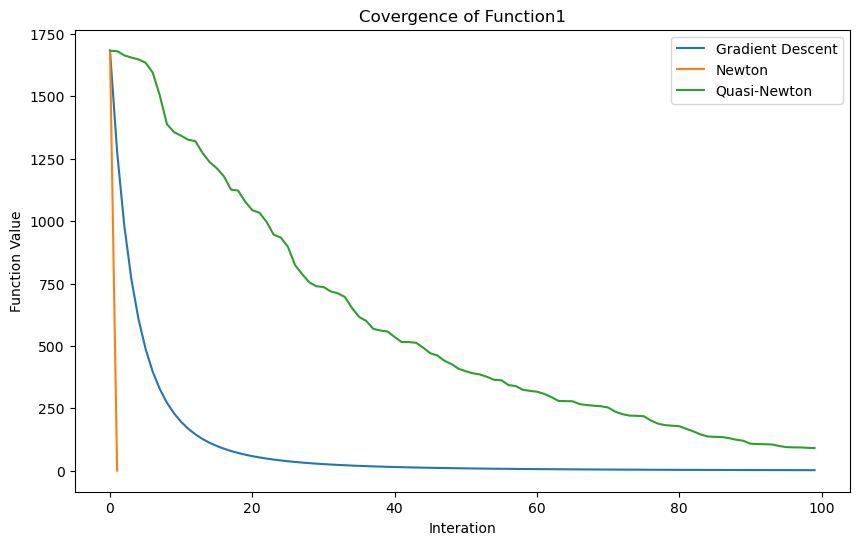

In [58]:
# ----- Function1 -----
max_iteration = 100
gd_result_f1, gd_history_f1 = gradient_descent(
    function1, grad_function1, x0_f1, max_iter=max_iteration
)
newton_result_f1, newton_history_f1 = newton_method(
    function1,
    grad_function1,
    lambda x: 2 * np.diag(np.arange(1, len(x) + 1)),
    x0_f1,
    max_iter=max_iteration,
)
quasi_newton_result_f1, quasi_newton_history_f1 = quasi_newton(
    function1, grad_function1, x0_f1, max_iter=max_iteration
)
signsgd_result_f1, signsgd_history_f1 = signgd(
    function1, grad_function1, x0_f1, max_iter=max_iteration
)

print("Function1 Results:")
print("Gradient Descent:", gd_result_f1)
print("Newton:", newton_result_f1)
print("Quasi-Newton:", quasi_newton_result_f1)
print("SignSGD:", signsgd_result_f1)

# Plot for function1
plt.figure(figsize=(10, 6))
plt.plot(gd_history_f1, label="Gradient Descent")
plt.plot(newton_history_f1, label="Newton")
plt.plot(quasi_newton_history_f1, label="Quasi-Newton")
plt.plot(signsgd_history_f1, label="SignSGD")
plt.xlabel("Interation")
plt.ylabel("Function Value")
plt.title("Covergence of Function1")
plt.legend()
plt.show()